1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Accuracy: 342.86%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      0.50      0.67         2
           2       0.86      1.00      0.92         6
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      0.60      0.75         5

    accuracy                           0.86        28
   macro avg       0.86      0.82      0.82        28
weighted avg       0.88      0.86      0.85        28



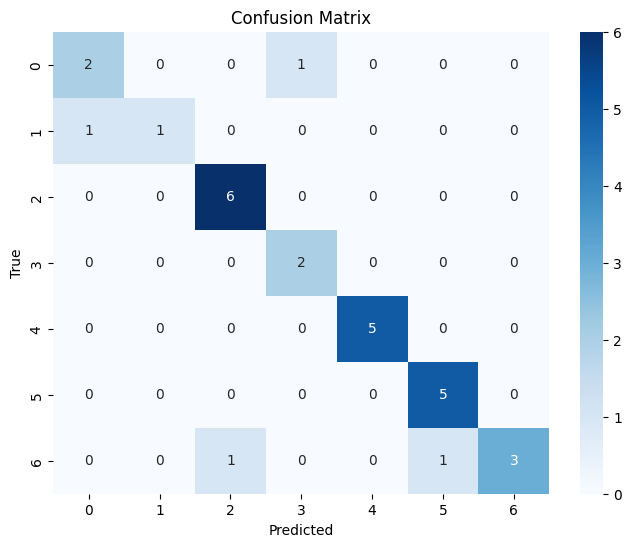

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import load_model
import tensorflow as tf

# 1. Đọc dữ liệu test
df_test = pd.read_csv('./dataset/test.csv')

# 2. Chuyển về mảng numpy dạng (samples, 400, 6)
X_test = df_test.drop("label", axis=1).to_numpy().reshape(-1, 400, 6)

# 3. Lấy nhãn từ mỗi block 400 dòng
labels = np.array(df_test["label"].iloc[np.arange(0, df_test.shape[0], 400)])

# 4. Scale dữ liệu
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test.reshape(-1, 400 * 6))  # Flatten để scale
X_test_scaled = X_test_scaled.reshape(-1, 400, 6)  # Reshape lại về (samples, 400, 6)

# 5. Encode nhãn và one-hot (giống lúc huấn luyện)
le = LabelEncoder()
le.fit(np.unique(labels))  # Nếu đã lưu le.classes_ từ trước, thì load lại

y_test_enc = le.transform(labels)
y_test_cat = tf.keras.utils.to_categorical(y_test_enc, num_classes=7)

# 6. Tải mô hình và dự đoán
model = load_model('./cbam_model.h5')
predictions = model.predict(X_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_cat, axis=1)

# 7. Đánh giá
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Accuracy: {accuracy_score(true_labels, predicted_labels) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
conf_mat = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
